In [1]:
import numpy as np
import fur.path_assistant as path_assistant
from config import get_from_config
Ex_3D = np.load(path_assistant.srw_Ex_3D_file_path)
Ey_3D = np.zeros(Ex_3D.shape)

In [2]:
from wiggler_radiation.transmission_data import transmission_function
from wigrad import Wiggler, WigglerRadiationSimulator
wiggler = Wiggler(K_peak=get_from_config("K_peak"))
rad_mesh = get_from_config("radiation_mesh")
zobs = get_from_config("z_obs_m")
theta_xs = rad_mesh[0][0]/zobs
theta_xf = rad_mesh[0][1]/zobs
theta_ys = rad_mesh[1][0]/zobs
theta_yf = rad_mesh[1][1]/zobs
xbins = rad_mesh[0][2]
ybins = rad_mesh[1][2]
ls = rad_mesh[2][0]
lf = rad_mesh[2][1]
lbins = rad_mesh[2][2]
mesh = (np.linspace(theta_xs, theta_xf, xbins),
        np.linspace(theta_ys, theta_yf, ybins),
        np.linspace(ls, lf, lbins))
spectral_transmission = transmission_function(mesh[2])
wr_sim = WigglerRadiationSimulator(
    wiggler,
    mesh,
    gamma=get_from_config("gamma"),
    harmonics=[1,2,3],
    aperture='ellipse',
    only_calc_sum_of_both_polarizations=False,  # if False, then both polarizations are calculated separately
    spectral_transmission=spectral_transmission
    )

In [3]:
elliptic_aperture = (wr_sim.x_3D**2/xf**2+wr_sim.y_3D**2/yf**2) < 1
Ex_3D = np.where(elliptic_aperture, Ex_3D, 0)
Ey_3D = np.where(elliptic_aperture, Ey_3D, 0)
Ex_3D = np.sqrt(spectral_transmission)[:, None, None]*Ex_3D
Ey_3D = np.sqrt(spectral_transmission)[:, None, None]*Ey_3D


In [4]:
wr_sim.set_photon_flux_3D(polarization='x', value=np.absolute(Ex_3D)**2)
wr_sim.set_photon_flux_3D(polarization='y', value=np.absolute(Ey_3D)**2)

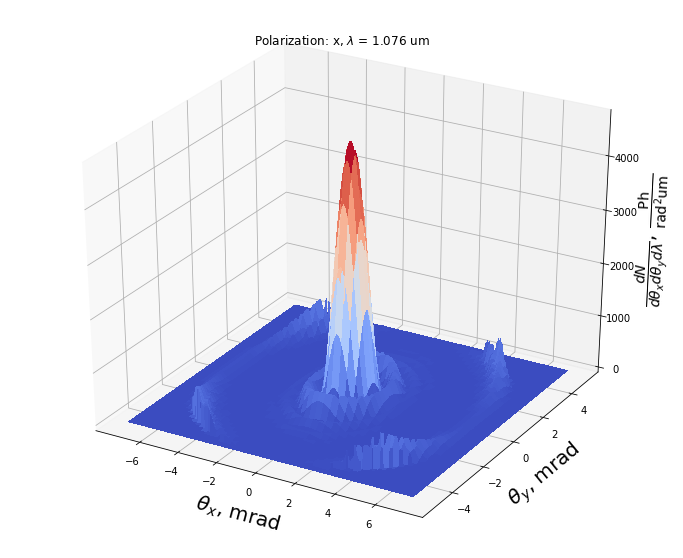

In [6]:
wr_sim.show_angular_distribution(polarization='x', index_of_lambda=int(lbins/2))

In [8]:
wr_sim.show_angular_distribution(polarization='sum')

In [9]:
wr_sim.show_spectral_distribution(angular_indexes_tuple=(int(xbins/2),int(ybins/2)))

In [10]:
wr_sim.show_spectral_distribution(polarization='sum')

In [11]:
wr_sim.get_total_photon_flux(polarization='sum')

0.01388651118893774

In [12]:
wr_sim.get_total_photon_flux(polarization='x')

0.01388651118893774

In [13]:
wr_sim.get_total_photon_flux(polarization='y')

0.0